# Assignment 5

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

In [1]:
import requests
import requests_cache
requests_cache.install_cache("aggie")
from bs4 import BeautifulSoup
import lxml
import urllib2
from urllib2 import Request, urlopen
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import nltk
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

<font color = "blue">
The function find_article_url() is used to extracts all of the links to articles in an Aggie article list. First of all, I used urlopen() in urllib2 to extracted the information form the webpage. And I chose to use BeatuifulSoup to scrape HTML.

In [2]:
def find_article_url(article_list_url, page = 1):
    """
    InputL: base url of the article list and the number of pages to fetch
    Output: a list of article URLs to the articles in an Aggie article list
    """
    url_list = []
    for i in xrange(1, page+1):
        page_url = article_list_url + "page/" + str(i) + "/"
        source = urllib2.urlopen(Request(page_url)).read()
        soup = BeautifulSoup(source,"lxml")
        articles = soup.find_all(class_ ="entry-title")
        for item in articles:
            url_list.append(item.a["href"])
    return url_list

In [3]:
find_article_url("https://theaggie.org/campus/",2)

['https://theaggie.org/2017/02/24/2017-winter-quarter-election-results/',
 'https://theaggie.org/2017/02/23/university-of-california-davis-city-council-sever-wells-fargo-contracts/',
 'https://theaggie.org/2017/02/23/academics-unite-in-peaceful-rally-against-immigration-ban/',
 'https://theaggie.org/2017/02/23/memorial-union-to-reopen-spring-quarter/',
 'https://theaggie.org/2017/02/23/asucd-president-alex-lee-vetoes-amendment-for-creation-of-judicial-council/',
 'https://theaggie.org/2017/02/22/senate-candidate-zaki-shaheen-withdraws-from-race/',
 'https://theaggie.org/2017/02/21/uc-davis-experiences-several-recent-hate-based-crimes/',
 'https://theaggie.org/2017/02/21/uc-president-selects-gary-may-as-new-uc-davis-chancellor/',
 'https://theaggie.org/2017/02/20/katehi-controversy-prompts-decline-of-uc-administrators-seeking-profitable-subsidiary-board-positions/',
 'https://theaggie.org/2017/02/20/asucd-senate-passes-resolution-submitting-comments-on-lrdp/',
 'https://theaggie.org/201

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

*   Python 2 displays some Unicode characters as `\uXXXX`. For instance, `\u201c` is a left-facing quotation mark.
    You can convert most of these to ASCII characters with the method call (on a string)
    ```
    .translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    ```
    If you're curious about these characters, you can look them up on [this page](http://unicode.org/cldr/utility/character.jsp), or read 
    more about [what Unicode is](http://unicode.org/standard/WhatIsUnicode.html).

<font color = "blue">
The function find_article_content() is used to extract the information of an article. The input should be a URL link of an article, and the output will be a dictionary with the information of articles including URL, text, author and title of the article. After searching, I found out that the title is under the root <div> and also <class>. In specific, the title will be under the first "class="entry-title" itemprop="headline". Therefore, I use soup.find() to find out which has an attribute “class” whose value is “entry-title”. Next for the paragraph, I used soup.find() to search under "h1" which have an attribute "itemprop" whose values are articleBody and find.all() to find out all "p". The results here were named paragraph. Since we would like to separated the information of author and text, I decide to extracted the information of author then use string method to delete the text of author from the whole paragraph. The information of author is always the last line of last paragraph. Therefore, I used last the result of paragraph and use str.split("\n") to find out the author. If the text start with "Written", we have the author information. If not, I filled the information of author as missing value. For the other paragraphs, I use .join() to combine them together.

In [4]:
def find_article_content(article_URL):
    """
    Input: URL of a article
    Output: a dictionary with the information of articles including URL, text, author and title of the article.
    """
    source = urlopen(Request(article_URL)).read()
    soup = BeautifulSoup(source,"lxml")
    title = soup.find('h1',attrs={'class':'entry-title'}).get_text().strip()
    paragraph = soup.find('div',attrs={'itemprop':'articleBody'}).find_all('p')
    author = paragraph[-1].get_text().split("\n")[-1]
    if not author.startswith("Written"):
        author = ""
    text = [x.get_text().strip() for x in paragraph]
    article = " ".join(text)
    article = article.replace(author,"")
    article = article.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    return {"url": article_URL, "title": title, "author": author, "text": article} 

In [5]:
find_article_content("https://theaggie.org/2017/02/21/uc-president-selects-gary-may-as-new-uc-davis-chancellor/")

{'author': u'Written by: Alyssa Vandenberg \xa0\u2014 campus@theaggie.org',
 'text': u'UC Board of Regents to vote on the appointment later this week University of California (UC) President Janet Napolitano announced her selection of Gary May as the new UC Davis chancellor on Feb. 21. May currently serves as the dean of Georgia Tech\'s College of Engineering. "Gary May is a dynamic leader and an accomplished scholar and engineer with a passion for helping others succeed," Napolitano said in a press release. "He was chosen from an extraordinarily talented pool of candidates because I believe he\'s the right person to guide UC Davis to even greater heights, advancing academic and research initiatives, building a stronger community with students, faculty, and staff, and furthering relations with the larger Davis and Sacramento areas." May will replace Ralph J. Hexter, who has been serving as interim chancellor since Napolitano put former Chancellor Linda P.B. Katehi on investigative leave

In [6]:
find_article_content("https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/")

{'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
 'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto 

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [7]:
campus_article = [find_article_content(url) for url in find_article_url("https://theaggie.org/campus/",4)]

In [8]:
print len(campus_article)
campus = pd.DataFrame(campus_article)
campus["category"] = "campus"
campus.head()

60


,author,text,title,url,category
0,Written by: Alyssa Vandenberg — campus@theagg...,"Six senators, new executive team elected Curre...",2017 Winter Quarter election results,https://theaggie.org/2017/02/24/2017-winter-qu...,campus
1,Written by: Aaron Liss and Raul Castellanos —...,"Wells Fargo faces fraud, predatory lending cha...","University of California, Davis City Council s...",https://theaggie.org/2017/02/23/university-of-...,campus
2,Written by: Kimia Akbari — campus@theaggie.org,"Faculty, students recount personal tales of im...",Academics unite in peaceful rally against immi...,https://theaggie.org/2017/02/23/academics-unit...,campus
3,Written by: Kenton Goldsby — campus@theaggie.org,Opening date pushed back to May 1 Students hav...,Memorial Union to reopen Spring Quarter,https://theaggie.org/2017/02/23/memorial-union...,campus
4,Written by: Ivan Valenzuela — campus@theaggie.org,Veto included revision abandoning creation of ...,ASUCD President Alex Lee vetoes amendment for ...,https://theaggie.org/2017/02/23/asucd-presiden...,campus


In [9]:
city_article = [find_article_content(url) for url in find_article_url("https://theaggie.org/city/",4)]

In [10]:
print len(city_article)
city = pd.DataFrame(city_article)
city["category"] = "city"
city.head()

60


,author,text,title,url,category
0,Written by: Kaelyn Tuermer-Lee — city@theaggie...,Local Whole Foods closes Feb. 12 After five ye...,Davis’ Whole Foods Market shuts down,https://theaggie.org/2017/02/23/davis-whole-fo...,city
1,Written By: Anya Rehon — city@theaggie.org,Demonstrations take place at hundreds of Plann...,Protest against Planned Parenthood in Woodland...,https://theaggie.org/2017/02/23/protest-agains...,city
2,Written By: Bianca Antunez — city@theaggie.org,California Redevelopment Agencies require Davi...,Davis’s Historic City Hall building to be put ...,https://theaggie.org/2017/02/23/daviss-histori...,city
3,Written by: Caitlyn Sampley — city@theaggie.org,Davis residents show solidarity in wake of tra...,Davis stands with Muslim residents,https://theaggie.org/2017/02/21/davis-stands-w...,city
4,Written By: Anya Rehon — city@theaggie.org,"CalRecycle donates $197,851 The City of Davis ...",City of Davis awarded funds for new recycling ...,https://theaggie.org/2017/02/20/city-of-davis-...,city


In [12]:
AllArticle = pd.concat([campus,city])
AllArticle = AllArticle.reset_index(drop = True)
print len(AllArticle)
AllArticle.head()

120


,author,text,title,url,category
0,Written by: Alyssa Vandenberg — campus@theagg...,"Six senators, new executive team elected Curre...",2017 Winter Quarter election results,https://theaggie.org/2017/02/24/2017-winter-qu...,campus
1,Written by: Aaron Liss and Raul Castellanos —...,"Wells Fargo faces fraud, predatory lending cha...","University of California, Davis City Council s...",https://theaggie.org/2017/02/23/university-of-...,campus
2,Written by: Kimia Akbari — campus@theaggie.org,"Faculty, students recount personal tales of im...",Academics unite in peaceful rally against immi...,https://theaggie.org/2017/02/23/academics-unit...,campus
3,Written by: Kenton Goldsby — campus@theaggie.org,Opening date pushed back to May 1 Students hav...,Memorial Union to reopen Spring Quarter,https://theaggie.org/2017/02/23/memorial-union...,campus
4,Written by: Ivan Valenzuela — campus@theaggie.org,Veto included revision abandoning creation of ...,ASUCD President Alex Lee vetoes amendment for ...,https://theaggie.org/2017/02/23/asucd-presiden...,campus


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

<font color = "blue">To deal with the text, I use CountVectorizer module in the sklearn package. Process the text with tokenization, lemmatation and remove the stop words.

For this question, I use term frequency to find out the topics of specific corpus. TF is the raw frequency of a term in a document. The higher tf is, the more important of a word. Here, I found out the count of each lemma in each article and sum them up as the total frequency in the coupus. Then I find out the tf of a lemma through dividing its times of appearance by N where N is the total number of lemmas. After I have the tf of each lemma, I can find out the top n lemma and used them to decide what topics the corpus covers.

In [13]:
tokenize = nltk.word_tokenize
def stem(tokens,stemmer = PorterStemmer().stem):
    return [stemmer(w.lower()) for w in tokens] 

def lemmatize(text):
    """
    Extract simple lemmas based on tokenization and stemming
    Input: string
    Output: list of strings (lemmata)
    """
    return stem(tokenize(text))

In [14]:
# function for finding tf
def find_tf(text,firstn = 20):
    """
    Input: a text and how many common words you would like to find out.
    Output: a pandas dataframe with two variables including the lemma and tf of a lemma.
    
    The data frame is ordered by the value of tf in an descending way.
    """
    count_vectorizer = CountVectorizer(tokenizer=lemmatize,stop_words="english")
    count = count_vectorizer.fit_transform(text)
    # find out what the lemma is 
    lemma = count_vectorizer.get_feature_names()
    # find the tf of each lemma
    nlemma = count_vectorizer.fit_transform(text)
    total_time_each_word = nlemma.toarray().sum(axis = 0)
    tf = total_time_each_word/float(total_time_each_word.sum())    
    df = pd.DataFrame([{"lemma":lemma[i],"tf":tf[i]} for i in xrange(len(lemma))])
    df = df.sort_values("tf", ascending=False)
    df = df.loc[df.lemma.str.isalpha(),]
    df = df.reset_index(drop = True)
    df = df.head(firstn)
    return df

<font color = "blue">Next, we can find out what words have higher tf in the Aggie corpus.

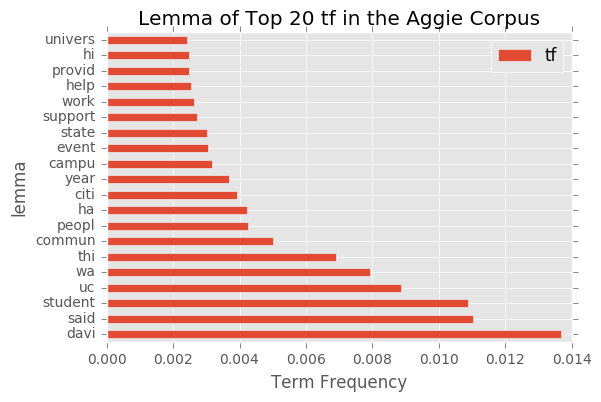

In [15]:
Aggie = find_tf(AllArticle["text"])
Aggie.plot.barh(x = 'lemma', y = 'tf')
plt.title("Lemma of Top 20 tf in the Aggie Corpus")
plt.xlabel("Term Frequency")
plt.show()

<font color = "blue">
From the above bar plot, the lemma with first 20 tf are shown. Although turning the words into lemma will loss some information, we can still infer that the topics of the Aggie corpus are more about students, people, community and what happened on campus and at city.

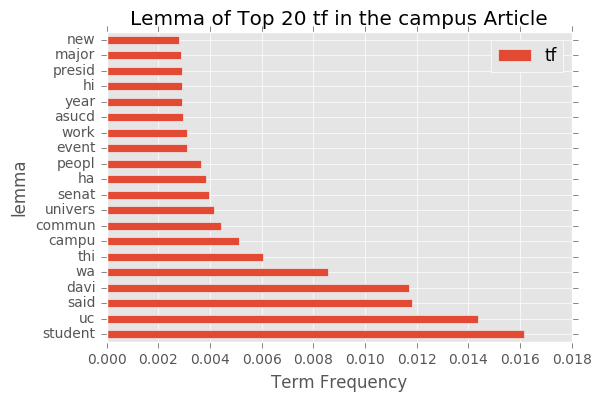

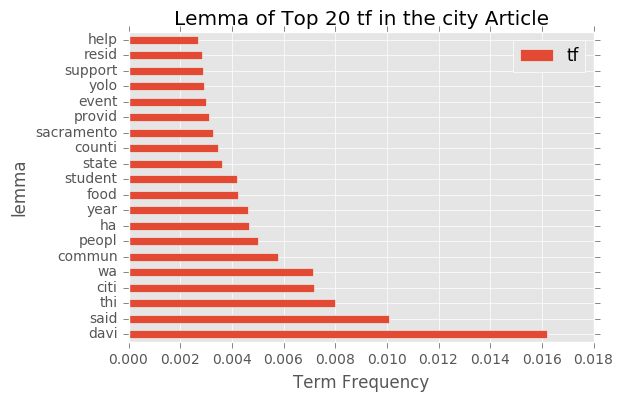

In [16]:
cate = ["campus","city"]
for i in xrange(len(cate)):
    common = find_tf(AllArticle.loc[AllArticle.category == cate[i]]["text"])
    common.plot.barh(x ='lemma', y = 'tf')
    plt.title("Lemma of Top 20 tf in the " + cate[i] + " Article")
    plt.xlabel("Term Frequency")
    plt.show() 

<font color = "blue">From the above plot and the tf of each lemma, the topics of campus articles are about students, campus, senate, and events. The topics of city articles are community, people, student, residence, food, music, events and sacramento. City article contains more topics than campus articles and the topics of city articles cover the topics of campus articles. And news for two categories all talk about things happened in davis since "davi" always in the top 3. This make sense because the Aggie is the news of Davis.

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

<font color = "blue">
In order to find out the top 3 pairs of most similar articles, I used TfidfVectorizer from sklearn to find out the tfidf matrice and cosine_similarity() which is also from sklearn module to find out the cosine similarity matrix of the 120 tfidf vectors.

Next, since the similarity matrix is an symmetric matrix and the diagonal of it is the relationship between one vector and itself, I used np.triu(matrix, k=1) to find out the upper triangle of the matrix. k=1 is used to make the diagonal element to be zero. Afterward, I findout the location of the top 3 values in the matrix and the (x,y) is the corresponding pairs.

In [17]:
vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words="english",smooth_idf=True,norm=None)
tfs = vectorizer.fit_transform(AllArticle["text"])
lemma = vectorizer.get_feature_names()

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
sim = cosine_similarity(tfs)
sim_upper_trin = np.triu(sim,k=1)

In [19]:
top3_similar = [np.where(sim_upper_trin == x) for x in sorted(sim_upper_trin.ravel())[-3:]]
top3_similar = [[x[0][0],x[1][0]] for x in top3_similar]
top3_similar

[[24, 38], [51, 58], [14, 35]]

<font color = "blue">
From the above calculation, the top 3 similar pairs are 
* articles in row 24 and 38
* articles in row 51 and 58
* articles in row 14 and 35
<br>

The articles can be found in the AllArticle pandas data frame above.

Next, I wrote a function find_common_word() to find out the common lemma of pairs of articles. After we had the tfidf values, if the value of tfidf is zero, it's clear that the lemma didn't appear in the text. By multipling two tfidf vectors and find out the lemms with nonzero tfidf multiplication result, we can have the common lemma.

In [21]:
def find_common_word(pair):
    """
    Input: the row number of a pair of articles in AllAtricle
    Output: the common lemma of the two articles.
    """
    tfs_for_2 = tfs.toarray()[pair,]
    index = [i for i in xrange(tfs_for_2.shape[1]) if tfs_for_2[0,i]*tfs_for_2[1,i] != 0]
    common_word = ", ".join([x for x in [lemma[i] for i in index] if x.isalpha()])
    return common_word

Pairs of top 3 similar article are as following:


The title for first article is University of California Regents meet, approve first tuition raise in six years
The title for second article is UC Regents vote to raise tuition for UC campuses


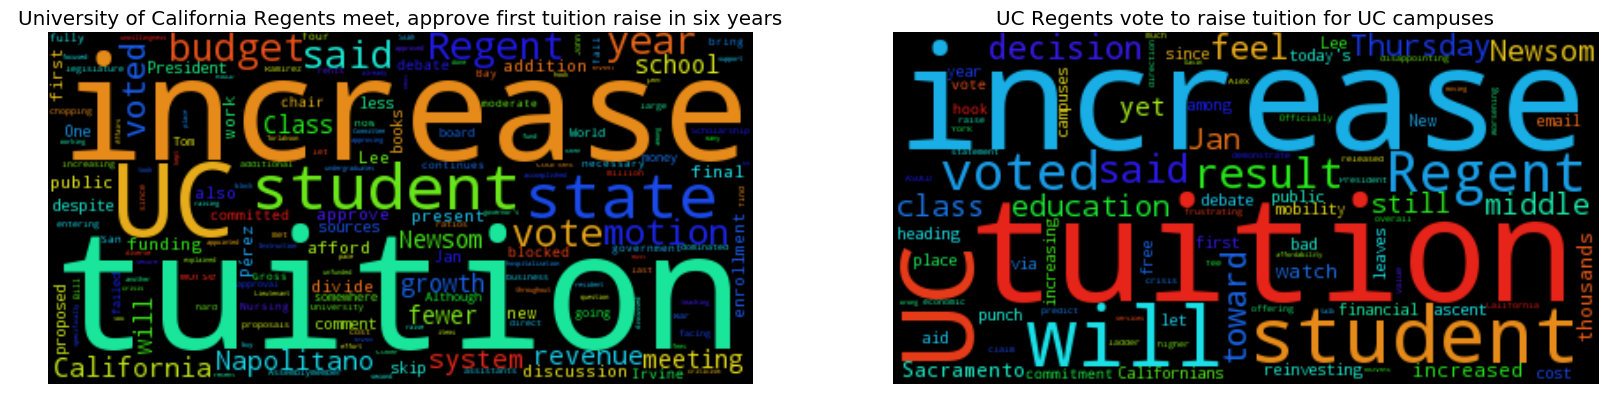

They have these lemma in common: afford, alex, asucd, california, commit, cost, crisi, debat, direct, fee, gavin, higher, hook, increas, lee, let, new, newsom, place, presid, public, rais, regent, said, servic, sinc, student, thi, tuition, uc, vote, wa, year

---------------------------------------------------------------------------------------------------------------------

The title for first article is Protests erupt at Milo Yiannopoulos event
The title for second article is Davis College Republicans club leads protest against cancellation of Milo Yiannopoulos event


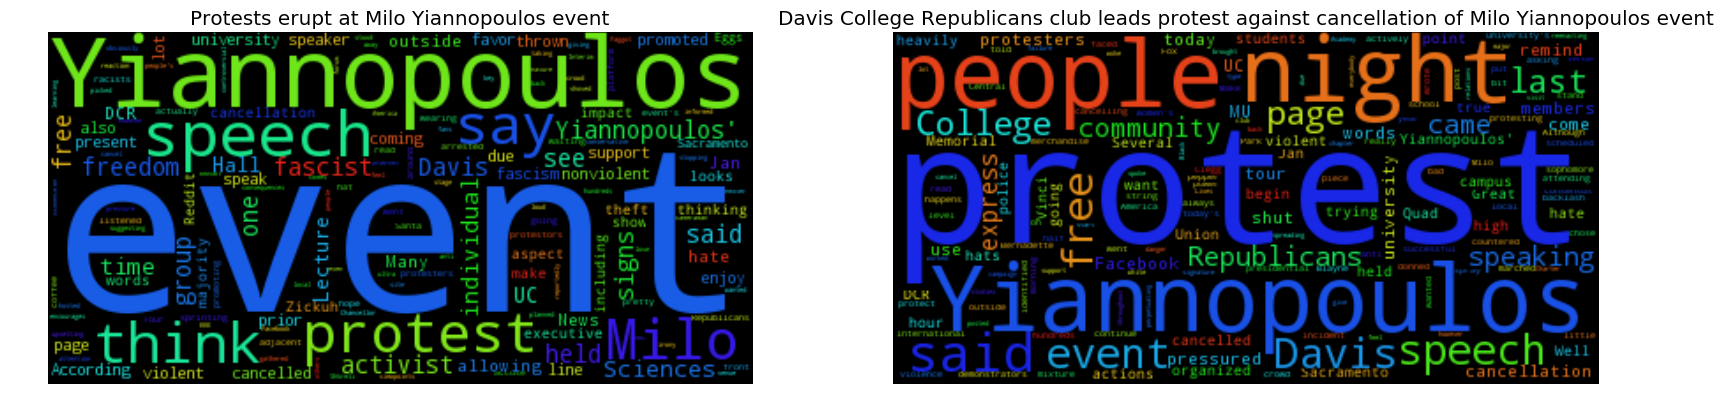

They have these lemma in common: america, attend, becaus, black, came, campu, cancel, claim, colleg, come, crowd, damag, danger, davi, dcr, event, face, facebook, feel, free, great, hat, hate, held, hi, host, howev, hundr, like, local, lot, major, make, matter, milo, minut, onli, outsid, page, peopl, pressur, properti, protect, protest, read, republican, sacramento, said, speak, speech, start, student, support, thi, time, tour, uc, univers, venu, veri, violent, visit, wa, want, went, word, yiannopoulo

---------------------------------------------------------------------------------------------------------------------

The title for first article is UC Davis holds first mental health conference
The title for second article is UC Davis to host first ever mental health conference


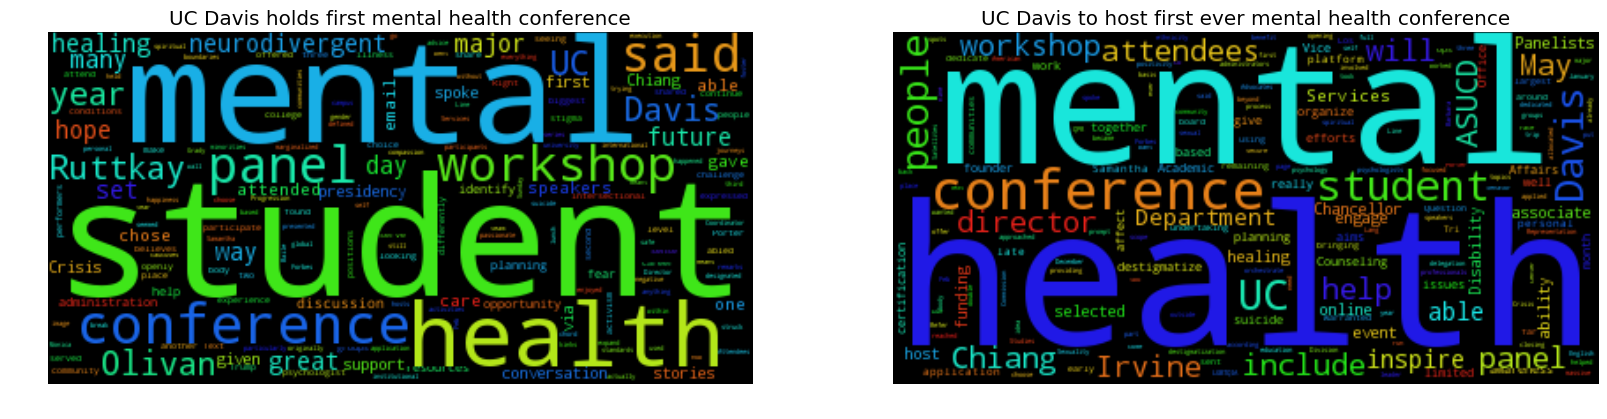

They have these lemma in common: abl, academ, administr, advoc, advocaci, aim, applic, approach, attend, attende, base, bodi, break, center, chiang, choos, close, come, commun, confer, counsel, crisi, davi, destigmat, director, disabl, engag, english, forb, founder, fund, gender, group, heal, health, help, host, includ, inspir, involv, juliet, lgbtqia, line, major, mental, monica, month, offer, onlin, open, opportun, organ, panel, panelist, peopl, perform, person, place, plan, porter, prevent, process, psycholog, psychologist, realli, remark, right, said, samantha, secur, select, set, speaker, spiritu, spoke, student, studi, suicid, text, thi, took, tri, uc, use, wa, want, work, workshop

---------------------------------------------------------------------------------------------------------------------


In [22]:
from wordcloud import WordCloud
print "Pairs of top 3 similar article are as following:\n"
number = ['first','second','third']
order = ['first','second']
for pair in top3_similar:   
    print 
    f, ax = plt.subplots(1,2, figsize =[20,5])
    ax = ax.ravel()
    for i in xrange(len(pair)):
        print "The title for " + order[i] + " article is " + AllArticle.ix[pair[i],"title"]
        wordcloud = WordCloud().generate(AllArticle.ix[pair[i],"text"])
        ax[i].imshow(wordcloud)
        ax[i].axis("off")
        ax[i].set_title(AllArticle.ix[pair[i],"title"])
    plt.show()
    print "They have these lemma in common: " + find_common_word(pair) +"\n"
    print "---------------------------------------------------------------------------------------------------------------------"

<font color = "blue">
From the word cloud for the three pairs, articles in each pairs are similar. The first pair is talking about the tuition increasing. The second one is about protest against yiannopoulos. The third one is about a conference about student mental health.

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.



In [23]:
source = urllib2.urlopen(Request("https://theaggie.org/")).read()
soup = BeautifulSoup(source,"lxml")
theAggieList = [i.get_text() for i in soup.find_all(class_ ="menu-title-outer")]
print "The Aggies is organized by category into article lists including " + ", ".join(theAggieList)

The Aggies is organized by category into article lists including Home, News, Features, Opinion, Arts and Culture, Sports, Science, Photo, Best of Davis 2016, Contact, Advertising, Print, Search


<font color = "blue">
I don't think this corpus is representative of the Aggies. Here is my reasons. 
* We only web-scraped the news of the first 4 pages of both campus and city list. However, there are 203 and 158 pages in total respectively. 
* The Aggies is organized by category into article lists. This corpus only includes the News Lists. It lost the information of other lists such as Arts & Culture or Sports.


<font color = "blue">
Some words with higher term frequency actually bring less meaning to decide the topics of the articles, such as `davis`. The Aggie corpus is the news of davis city and UC Davis. Although 'davis' is common but we can not get more information after knowing that `davis` has higher term frequency. Maybe some other method can be implemented to find out more unique words.